In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
length = df['petal_length']
width = df['petal_width']

In [4]:
from scipy.stats import norm

class LinearRegression(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: petal lengths, petal widths
        hypo: beta, sigma
        """
        beta0, beta1, sigma = hypo
        lengths, widths = data
        
        predicted_widths = (beta1 * lengths) + beta0
        
        likes = norm.pdf(widths, predicted_widths , sigma)
        return np.prod(likes)

In [5]:
beta0s = np.linspace(-2, 2, 101)
beta1s = np.linspace(-2, 2, 101)
sigmas = np.linspace(0.1, 2, 101)

In [6]:
from itertools import product

regression = LinearRegression(product(beta0s, beta1s, sigmas))
data = (length, width)
regression.Update(data)

17693.746993680583

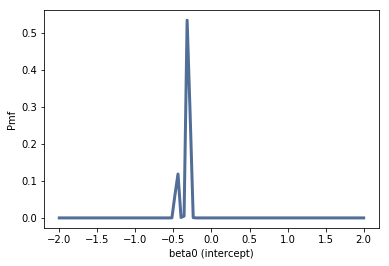

In [7]:
pmf_beta0 = regression.Marginal(0)
thinkplot.Pdf(pmf_beta0)
thinkplot.Config(xlabel='beta0 (intercept)', ylabel='Pmf')

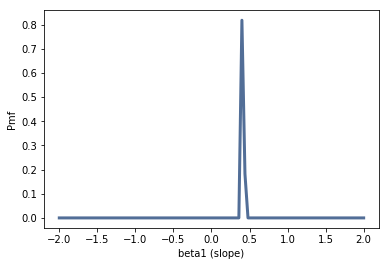

In [8]:
pmf_beta1 = regression.Marginal(1)
thinkplot.Pdf(pmf_beta1)
thinkplot.Config(xlabel='beta1 (slope)', ylabel='Pmf')

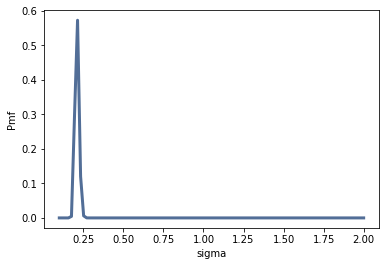

In [9]:
pmf_sigma = regression.Marginal(2)
thinkplot.Pdf(pmf_sigma)
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

In [12]:
#Get confidence intervals
beta0 = pmf_beta0.Mean()
beta1 = pmf_beta1.Mean()
sigma = pmf_sigma.Mean()
beta0, beta1, sigma

(-0.3333552237006441, 0.4072880136364318, 0.21073113517645398)

In [13]:
pmf_beta0.CredibleInterval(95), pmf_beta1.CredibleInterval(95), pmf_sigma.CredibleInterval(95)

((-0.48, -0.28), (0.3999999999999999, 0.43999999999999995), (0.195, 0.233))

##### Linear regression fit with ordinary least squares gives:
* Intercept: -.363
* Slope: .416
* Sigma: .206

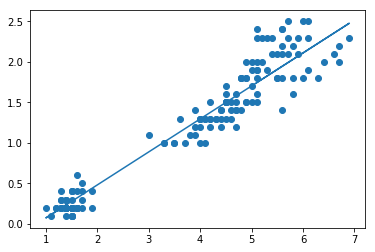

In [11]:
#plot the regression fit
plt.scatter(length, width)
plt.plot(length, beta1*length + beta0, '-')
plt.show()